In [160]:
!pwd
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

/Users/songyuhan/Documents/EB5204_Sentiment_Mining_CA


In [161]:
##using for generating report later

def classification_report_csv(report, csv_name):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split(' ') 
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(csv_name, index = False)


## get test data from csv file

In [169]:
dfCN = pd.read_csv('./data/df_test_chinese_with_negation.csv',encoding ="ISO-8859-1")
dfFR = pd.read_csv('./data/df_test_french_with_negation.csv',encoding = 'ISO-8859-1')
dfIN = pd.read_csv('./data/df_test_indian_with_negation.csv',encoding = 'ISO-8859-1')
dfJP = pd.read_csv('./data/df_test_japanese_with_negation.csv',encoding = 'ISO-8859-1')
dfCN.head()


,Unnamed: 0,rating,review,sentiment
0,0,5,let be real here london noodle alright let go ...,1
1,1,5,go london have chinese food course i 've be lo...,1
2,2,5,family i visit london few day be look nice noo...,1
3,3,5,place be so unassuming very easy pass look bad...,1
4,4,3,'s small cramped little hole wall noodle be ha...,-1


In [170]:
dfCN.drop(['Unnamed: 0', 'rating'], inplace=True, axis=1)
dfFR.drop(['Unnamed: 0', 'rating'], inplace=True, axis=1)
dfIN.drop(['Unnamed: 0','rating'], inplace=True, axis=1)
dfJP.drop(['Unnamed: 0','rating'], inplace=True, axis=1)
#dfJP.drop(['category', 'id', 'name', 'rating'], inplace=True, axis=1)
dfJP.head()

,review,sentiment
0,be back july make point return zuma food be st...,1
1,zuma have maintain 's consistency food quality...,1
2,sushi dish here be spectacular black cod be so...,1
3,short over-rated.i apologize i 'm gong be brut...,-1
4,cool / fancy place have great japanese food ev...,1


In [171]:
testCN = dfCN['review']
testFR = dfFR['review']
testIN = dfIN['review']
testJP = dfJP['review']
testCN_lab = dfCN['sentiment']
testFR_lab = dfFR['sentiment']
testIN_lab = dfIN['sentiment']
testJP_lab = dfJP['sentiment']
print("Chinese Resturant :",len(testCN_lab))
print("French Resturant :",len(testFR_lab))
print("Indian Resturant :",len(testIN_lab))
print("Japanese Resturant :",len(testJP_lab))

Chinese Resturant : 650
French Resturant : 980
Indian Resturant : 1369
Japanese Resturant : 552


## testing result using model only trained by scraped data

### firstly ,need to change the test data to the same dimention as the training data

In [172]:
with open('./models/preprocessed_negated/vectorise_negation.pk', 'rb') as vectorizer:
    vectorizer = pk.load(vectorizer)
test_vectorsCN = vectorizer.transform(testCN)
test_vectorsFR = vectorizer.transform(testFR)
test_vectorsIN = vectorizer.transform(testIN)
test_vectorsJP = vectorizer.transform(testJP)
print(test_vectorsCN.shape)
print(test_vectorsFR.shape)
print(test_vectorsIN.shape)
print(test_vectorsJP.shape)

(650, 17423)
(980, 17423)
(1369, 17423)
(552, 17423)


### secondly, check the 4 kinds of resturants test score using Naive Bayes and SVM classifier

In [173]:
# load naivebayes
with open('./models/preprocessed_negated/classifier_negation_naivebayes.pk', 'rb') as naivebayes:
    model1 = pk.load(naivebayes)
    predCN_na = model1.predict(test_vectorsCN)
    predFR_na = model1.predict(test_vectorsFR)
    predIN_na = model1.predict(test_vectorsIN)
    predJP_na = model1.predict(test_vectorsJP)
    predCN_na = list(predCN_na)
    predFR_na = list(predFR_na)
    predIN_na = list(predIN_na)
    predJP_na = list(predJP_na)
    cmCN_na = pd.crosstab(pd.Series(testCN_lab), pd.Series(predCN_na), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmFR_na = pd.crosstab(pd.Series(testFR_lab), pd.Series(predFR_na), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmIN_na = pd.crosstab(pd.Series(testIN_lab), pd.Series(predIN_na), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmJP_na = pd.crosstab(pd.Series(testJP_lab), pd.Series(predJP_na), rownames= ['actuals'], colnames=['pred'],margins=True)

In [174]:
#chinese resturant
cmCN_na

pred,-1,1,All
actuals,,,
-1,153,85,238
1,40,372,412
All,193,457,650


In [175]:
print (classification_report(predCN_na,  testCN_lab))
print (accuracy_score(predCN_na, testCN_lab))

             precision    recall  f1-score   support

         -1       0.64      0.79      0.71       193
          1       0.90      0.81      0.86       457

avg / total       0.83      0.81      0.81       650

0.8076923076923077


In [176]:
pd.DataFrame(cmCN_na).to_csv('Chinese_naive_bayes.csv')
report = classification_report(predCN_na, testCN_lab)
classification_report_csv(report,'Chinese_naive_bayes_report.csv')

In [177]:
Chinese_nb_result = pd.Series(predCN_na)

In [178]:
#French resturant
cmFR_na

pred,-1,1,All
actuals,,,
-1,153,65,218
1,46,716,762
All,199,781,980


In [179]:
print (classification_report(predFR_na,  testFR_lab))
print (accuracy_score(predFR_na, testFR_lab))

             precision    recall  f1-score   support

         -1       0.70      0.77      0.73       199
          1       0.94      0.92      0.93       781

avg / total       0.89      0.89      0.89       980

0.886734693877551


In [180]:
pd.DataFrame(cmFR_na).to_csv('French_naive_bayes.csv')
report = classification_report(predFR_na, testFR_lab)
classification_report_csv(report,'French_naive_bayes_report.csv')

In [181]:
French_nb_result = pd.Series(predFR_na)

In [182]:
#Indian resturant
cmIN_na

pred,-1,1,All
actuals,,,
-1,139,129,268
1,40,1061,1101
All,179,1190,1369


In [183]:
print (classification_report(predIN_na,  testIN_lab))
print (accuracy_score(predIN_na, testIN_lab))

             precision    recall  f1-score   support

         -1       0.52      0.78      0.62       179
          1       0.96      0.89      0.93      1190

avg / total       0.91      0.88      0.89      1369

0.8765522279035792


In [184]:
pd.DataFrame(cmIN_na).to_csv('Indian_naive_bayes.csv')
report = classification_report(predIN_na, testIN_lab)
classification_report_csv(report,'Indian_naive_bayes_report.csv')

In [185]:
Indian_nb_result = pd.Series(predIN_na)

In [186]:
#Japanese resturant
cmJP_na

pred,-1,1,All
actuals,,,
-1,88,36,124
1,39,389,428
All,127,425,552


In [187]:
print (classification_report(predJP_na,  testJP_lab))
print (accuracy_score(predJP_na, testJP_lab))

             precision    recall  f1-score   support

         -1       0.71      0.69      0.70       127
          1       0.91      0.92      0.91       425

avg / total       0.86      0.86      0.86       552

0.8641304347826086


In [188]:
pd.DataFrame(cmJP_na).to_csv('Janpanese_naive_bayes.csv')
report = classification_report(predJP_na, testJP_lab)
classification_report_csv(report,'Japanese_naive_bayes_report.csv')

In [189]:
Japanese_nb_result = pd.Series(predJP_na)

In [190]:
# load SVM
with open('./models/preprocessed_negated/classifier_negation_svm.pk', 'rb') as svm:
    model2 = pk.load(svm)
    predCN_svm = model2.predict(test_vectorsCN)
    predFR_svm = model2.predict(test_vectorsFR)
    predIN_svm = model2.predict(test_vectorsIN)
    predJP_svm = model2.predict(test_vectorsJP)
    predCN_svm = list(predCN_svm)
    predFR_svm = list(predFR_svm)
    predIN_svm = list(predIN_svm)
    predJP_svm = list(predJP_svm)
    cmCN_svm = pd.crosstab(pd.Series(testCN_lab), pd.Series(predCN_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmFR_svm = pd.crosstab(pd.Series(testFR_lab), pd.Series(predFR_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmIN_svm = pd.crosstab(pd.Series(testIN_lab), pd.Series(predIN_svm), rownames= ['actuals'], colnames=['pred'],margins=True)
    cmJP_svm = pd.crosstab(pd.Series(testJP_lab), pd.Series(predJP_svm), rownames= ['actuals'], colnames=['pred'],margins=True)

In [191]:
#Chinese resturant
cmCN_svm

pred,-1,1,All
actuals,,,
-1,190,48,238
1,58,354,412
All,248,402,650


In [192]:
print (classification_report(predCN_svm,  testCN_lab))
print (accuracy_score(predCN_svm, testCN_lab))

             precision    recall  f1-score   support

         -1       0.80      0.77      0.78       248
          1       0.86      0.88      0.87       402

avg / total       0.84      0.84      0.84       650

0.8369230769230769


In [193]:
pd.DataFrame(cmCN_svm).to_csv('Chinese_svm.csv')
report = classification_report(predCN_svm, testCN_lab)
classification_report_csv(report,'Chinese_svm_report.csv')

In [194]:
Chinese_svm_result = pd.Series(predCN_svm)

In [195]:
#French resturant
cmFR_svm

pred,-1,1,All
actuals,,,
-1,168,50,218
1,79,683,762
All,247,733,980


In [196]:
print (classification_report(predFR_svm,  testFR_lab))
print (accuracy_score(predFR_svm, testFR_lab))

             precision    recall  f1-score   support

         -1       0.77      0.68      0.72       247
          1       0.90      0.93      0.91       733

avg / total       0.86      0.87      0.87       980

0.8683673469387755


In [197]:
pd.DataFrame(cmFR_svm).to_csv('French_svm.csv')
report = classification_report(predFR_svm, testFR_lab)
classification_report_csv(report,'French_svm_report.csv')

In [198]:
French_svm_result = pd.Series(predFR_svm)

In [199]:
#India resturant
cmIN_svm

pred,-1,1,All
actuals,,,
-1,199,69,268
1,65,1036,1101
All,264,1105,1369


In [200]:
print (classification_report(predIN_svm,  testIN_lab))
print (accuracy_score(predIN_svm, testIN_lab))

             precision    recall  f1-score   support

         -1       0.74      0.75      0.75       264
          1       0.94      0.94      0.94      1105

avg / total       0.90      0.90      0.90      1369

0.902118334550767


In [201]:
pd.DataFrame(cmIN_svm).to_csv('Indian_svm.csv')
report = classification_report(predIN_svm, testIN_lab)
classification_report_csv(report,'Indian_svm_report.csv')

In [202]:
Indian_svm_result = pd.Series(predIN_svm)

In [203]:
#Japanese resturant
cmJP_svm

pred,-1,1,All
actuals,,,
-1,99,25,124
1,43,385,428
All,142,410,552


In [204]:
print (classification_report(predJP_svm,  testJP_lab))
print (accuracy_score(predJP_svm, testJP_lab))

             precision    recall  f1-score   support

         -1       0.80      0.70      0.74       142
          1       0.90      0.94      0.92       410

avg / total       0.87      0.88      0.87       552

0.8768115942028986


In [205]:
pd.DataFrame(cmJP_svm).to_csv('Japanese_svm.csv')
report = classification_report(predJP_svm, testJP_lab)
classification_report_csv(report,'Japanese_svm_report.csv')

In [206]:
Japanese_svm_result = pd.Series(predJP_svm)

### load all the result to csv file

In [207]:
df_result = pd.concat([pd.Series(testCN_lab), Chinese_nb_result, Chinese_svm_result], keys=["actual", "nb", "svm"], axis=1)
df_result.to_csv('Chinese_result.csv')

In [208]:
df_result = pd.concat([pd.Series(testFR_lab), French_nb_result, French_svm_result], keys=["actual", "nb", "svm"], axis=1)
df_result.to_csv('French_result.csv')

In [209]:
df_result = pd.concat([pd.Series(testIN_lab), Indian_nb_result, Indian_svm_result], keys=["actual", "nb", "svm"], axis=1)
df_result.to_csv('Indian_result.csv')

In [210]:
df_result = pd.concat([pd.Series(testJP_lab), Japanese_nb_result, Japanese_svm_result], keys=["actual", "nb", "svm"], axis=1)
df_result.to_csv('Japanese_result.csv')

In [237]:
## concact with the original test csv file and further translate into JSON file
cn = pd.read_csv('./data/df_test_chinese.csv') 
cn_score = pd.read_csv('./test_result/chinese_result 3.csv') 
cn.head()

,category,id,name,rating,review,sentiment
0,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,Let's be real here...London...and noodles?? Ye...,1
1,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,Who goes to London and has Chinese food? Me of...,1
2,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,My family and I visited London for a few days ...,1
3,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,This place is so unassuming and very easy to p...,1
4,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,3,It's a small and cramped little hole in the wa...,-1


In [238]:
cn_score.head()

,Unnamed: 0,actual,nb,svm
0,0,1,1,1
1,1,1,1,1
2,2,1,1,1
3,3,1,1,1
4,4,-1,1,1


In [239]:
cn['svm_score']=cn_score['svm']
cn['naive_bayes_score']=cn_score['nb']
cn.to_csv('Chinese_test_final.csv')
cn.head()

,category,id,name,rating,review,sentiment,svm_score,naive_bayes_score
0,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,Let's be real here...London...and noodles?? Ye...,1,1,1
1,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,Who goes to London and has Chinese food? Me of...,1,1,1
2,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,My family and I visited London for a few days ...,1,1,1
3,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,5,This place is so unassuming and very easy to p...,1,1,1
4,chinese,VZqEzifhvtYAxkWw6AuiCg,Lanzhou Noodle Bar,3,It's a small and cramped little hole in the wa...,-1,1,1


## conclusion 
We test the 4 categories of resturants using 3 types of models: model trained with only scraped data; scraped data combined with the standard data; negation combined data.

We measure the overall accuracy and the model trained with negation data performs best among the 3 types (both on SVN and Naive Bayes).Then we save the best one to the csv and generate the JSON format.
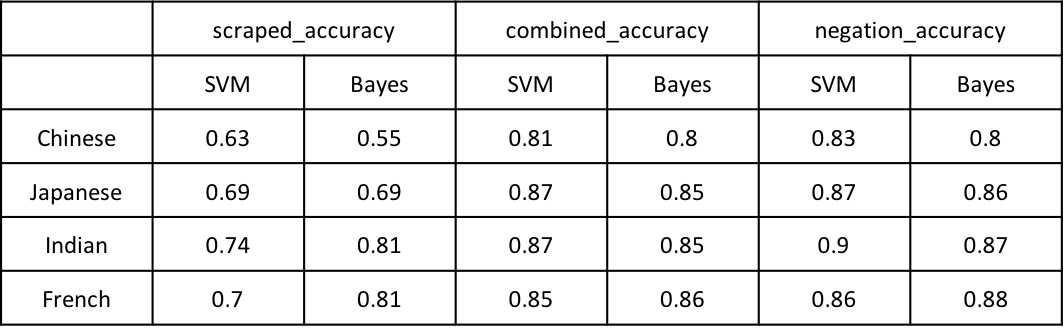
The conclusion of the test result are the followings:
1) from the overall accuracy ,we can tell that using the preprocessed data ,the model is robust and thus we can yield much better result on the test data.
2) as for the Chinese resturant , because there are some Chinese words can not be indentified ,so the overall accuracy not performs well compared with other 3 types of resturants.
3) for the sentiment score , negation plays very improtant role and yile the best result by implementing negation into the preprocess data.